Problem Statement:

In the real estate industry, determining the appropriate rental price for a property is crucial for
property owners, tenants, and property management companies. Accurate rent predictions can
help landlords set competitive prices, tenants make informed rental decisions, and property
management companies optimize their portfolio management.
The goal of this project is to develop a data-driven model that predicts the rental price of
residential properties based on relevant features. By analyzing historical rental data and
property attributes, the model aims to provide accurate and reliable rent predictions.

```
# This is formatted as code
```



In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [162]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [163]:
data = pd.read_excel('House_Rent_Train.xlsx')


# **Data Preprocessing**

In [164]:
pd.set_option('display.max_columns', 500)

In [165]:
data.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

In [166]:
data.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [167]:
data.tail()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,SEMI_FURNISHED,BOTH,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,0,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20554,23,BHK1,NaN,NaN,NaN,NaN,NaN,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
print("total_columns ----->>>>>", data.shape[1])
print("total_rows----->>>>>", data.shape[0])

total_columns ----->>>>> 25
total_rows----->>>>> 20555


In [169]:
data.drop(columns = ['id'],inplace=True)

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             20528 non-null  object 
 1   locality         20395 non-null  object 
 2   activation_date  20532 non-null  object 
 3   latitude         20532 non-null  float64
 4   longitude        20532 non-null  float64
 5   lease_type       20532 non-null  object 
 6   gym              20555 non-null  int64  
 7   lift             20555 non-null  int64  
 8   swimming_pool    20555 non-null  int64  
 9   negotiable       20555 non-null  int64  
 10  furnishing       20555 non-null  object 
 11  parking          20555 non-null  object 
 12  property_size    20555 non-null  int64  
 13  property_age     20532 non-null  float64
 14  bathroom         20532 non-null  float64
 15  facing           20532 non-null  object 
 16  cup_board        20532 non-null  float64
 17  floor       

In [171]:
#need to change activation data object to dateandtime
# bathroom float to int
#cup_board float to int
#floor float to int
#total_floor float to int
#amenities convert to right format
#balconies float to int


In [172]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)



,percent_missing
locality,0.778399
type,0.131355
balconies,0.111895
building_type,0.111895
water_supply,0.111895
amenities,0.111895
total_floor,0.111895
floor,0.111895
cup_board,0.111895
facing,0.111895


In [173]:
data.dropna(subset=['longitude'], inplace=True) # longitude latitude 
data.dropna(subset=['latitude'], inplace=True)

In [174]:
print(data.isnull().sum().sort_values(ascending=False))

locality           137
type                18
balconies            0
building_type        0
water_supply         0
amenities            0
total_floor          0
floor                0
cup_board            0
facing               0
bathroom             0
property_age         0
property_size        0
parking              0
furnishing           0
negotiable           0
swimming_pool        0
lift                 0
gym                  0
lease_type           0
longitude            0
latitude             0
activation_date      0
rent                 0
dtype: int64


*IMPUTATION*

In [175]:
#data.dropna(subset=['locality'], inplace=True)

from geopy.geocoders import Nominatim
import pandas as pd


missing_localities = data[data['locality'].isnull()]

# Initialize geocoder
geolocator = Nominatim(user_agent="reverse_geocoding")

# Function to get locality from latitude and longitude
def get_locality(latitude, longitude):
    location = geolocator.reverse((latitude, longitude), language='en')
    return location.address

# Iterate over rows with missing localities and fill them
for index, row in missing_localities.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    locality = get_locality(latitude, longitude)
    # Update the 'locality' column with the obtained value
    data.at[index, 'locality'] = locality



In [176]:
pip install geopy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [177]:
data.locality.nunique()

2048

In [ ]:
data['locality'].value_counts().head(60)

In [179]:
data['locality'].value_counts().tail(60)

locality
vignan nagar                                                                                                            1
Lore Pride, Ferns City, Bengaluru, Karnataka, India                                                                     1
Koralur, Karnataka,Koralur                                                                                              1
Amblipura, 1st Sector                                                                                                   1
Bannerghatta Road                                                                                                       1
Krishnappa Layout, Durga Parameshwari Nagar, Bangarappanagar, RR Nagar, Bengaluru, Karnataka 560085, India,Bengaluru    1
HVR Layout                                                                                                              1
Someshwara Nagar, Bengaluru, Karnataka, India                                                                           1
West Avenue Roa

In [180]:
data

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,"Embassy Meadows, 7, 8th Cross Road, ST Bed Lay...",21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,NaN,"Gattigere,RR Nagar",13-12-2017 18:08,12.925380,77.524397,ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,1650,1.0,3.0,E,3.0,4.0,4.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,25000.0
20528,BHK2,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10.0,2.0,N,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0
20529,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,W,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0
20530,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0


In [181]:
data['locality'].value_counts()

locality
Whitefield                                                                                                            903
HSR Layout                                                                                                            682
Banashankari                                                                                                          644
Marathahalli                                                                                                          473
Bellandur                                                                                                             433
                                                                                                                     ... 
3rdmain 5th cross link road kempegowdalayoutBanashankari, Bengaluru, Karnataka, India                                   1
Basaweshwar nagar                                                                                                       1
Agrahara Dasara

In [182]:
import pandas as pd

# Assuming data is your DataFrame containing the 'locality' column
# Let's create a copy of the 'locality' column to work with
data['locality'] = data['locality'].copy()

# Splitting the 'locality' column based on commas and spaces and taking the first part
data['locality'] = data['locality'].str.split(',').str[0]
data['locality'] = data['locality'].str.split().str[0]

# Displaying the first few rows to verify the changes
print(data['locality'].tail(60))


20472        Whitefield
20473        Kempegowda
20474       Bhoganhalli
20475               HSR
20476           Varthur
20477                JP
20478        Whitefield
20479                JP
20480      Basavanagudi
20481            Vignan
20482              Raja
20483      Mahadevapura
20484     Kasavanahalli
20485      Basavanagara
20486        Whitefield
20487         Jayanagar
20488          Sarjapur
20489         Bellandur
20490      Bommanahalli
20491     Kaggadasapura
20492            Ulsoor
20493        Someshwara
20494    Seetharampalya
20495         Gattigere
20496       Koramangala
20497       Kumaraswamy
20498       Indiranagar
20499      Malleshwaram
20500     Kasavanahalli
20501      Basavanagara
20502        Whitefield
20503         Jayanagar
20504          Sarjapur
20505         Bellandur
20506      Bommanahalli
20507     Kaggadasapura
20508            Ulsoor
20509        Someshwara
20510    Seetharampalya
20511         Gattigere
20512       Koramangala
20513       Kuma

In [183]:
data['type'].value_counts()

type
BHK2        11671
BHK3         4387
BHK1         3607
RK1           553
BHK4          233
BHK4PLUS       31
bhk2           16
bhk3           12
1BHK1           4
Name: count, dtype: int64

In [184]:
data['type'].fillna(data['type'].mode()[0], inplace = True)

In [244]:
# Assuming 'data' is the name of your DataFrame

# Mapping to consolidate similar categories
type_mapping = {
    'BHK2': 'BHK2',
    'bhk2': 'BHK2',
    'BHK3': 'BHK3',
    'bhk3': 'BHK3',
    'BHK1': 'BHK1',
    'RK1': 'RK1',
    'BHK4': 'BHK4',
    'BHK4PLUS': 'BHK4PLUS',
    '1BHK1': 'BHK1'
}

# Apply the mapping to the 'type' column
data['type'] = data['type'].map(type_mapping)

# Verify the changes
print(data['type'].value_counts())

type
BHK2        11705
BHK3         4399
BHK1         3611
RK1           553
BHK4          233
BHK4PLUS       31
Name: count, dtype: int64


In [186]:
print(data.isnull().sum().sort_values(ascending=False))

type               0
locality           0
balconies          0
building_type      0
water_supply       0
amenities          0
total_floor        0
floor              0
cup_board          0
facing             0
bathroom           0
property_age       0
property_size      0
parking            0
furnishing         0
negotiable         0
swimming_pool      0
lift               0
gym                0
lease_type         0
longitude          0
latitude           0
activation_date    0
rent               0
dtype: int64


In [187]:
data.locality[0]

'Embassy'

*CONVERT INTO RIGHT FORMAT*

In [188]:
## Convert 'activation' column to datetime
data['activation_date'] = pd.to_datetime(data['activation_date'])

C:\Users\morle\AppData\Local\Temp\ipykernel_18508\1294172545.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['activation_date'] = pd.to_datetime(data['activation_date'])


In [189]:
data['activation_date'].dtype

dtype('<M8[ns]')

In [190]:
# Replace 'bathroom', 'cup_board', 'floor', 'total_floor', 'balconies' with the actual column names

data['bathroom'] = data['bathroom'].astype(int)
data['cup_board'] = data['cup_board'].astype(int)
data['floor'] = data['floor'].astype(int)
data['total_floor'] = data['total_floor'].astype(int)
data['balconies'] = data['balconies'].astype(int)
data['property_age'] = data['property_age'].astype(int)
data['rent'] = data['rent'].astype(int)

In [191]:
#data['amenities'][0]
data['amenities'][3]

'{"LIFT":false,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":false,"SC":false,"GP":false,"PARK":false,"RWH":false,"STP":false,"HK":false,"PB":false,"VP":false}'

In [192]:
import json

# Assuming 'data' is the name of your DataFrame
data['amenities'] = data['amenities'].apply(json.loads)
data['true_amenities_count'] = data['amenities'].apply(lambda x: list(x.values()).count(True))


In [193]:
data.drop(columns = 'amenities', inplace = True)

In [194]:
data['balconies'].value_counts()

balconies
1     8010
0     5901
2     4687
3     1594
4      291
5       41
6        4
10       3
13       1
Name: count, dtype: int64

In [195]:
data['building_type'].value_counts()

building_type
IF    9240
AP    8876
IH    2399
GC      17
Name: count, dtype: int64

In [196]:
data['water_supply'].value_counts()

water_supply
CORP_BORE      10709
CORPORATION     6729
BOREWELL        3094
Name: count, dtype: int64

In [197]:
data['total_floor'].value_counts()

total_floor
2     4857
4     4835
3     4668
1     2110
5     1491
0      363
14     240
12     214
6      212
9      207
11     197
10     195
8      183
13     171
7      168
15     124
19      70
16      65
18      53
17      37
20      25
21      18
23       9
24       7
25       5
22       4
26       4
Name: count, dtype: int64

In [198]:
data.activation_date.value_counts()

activation_date
2017-04-11 18:11:00    4
2018-08-07 22:31:00    3
2018-07-04 18:04:00    3
2018-01-27 12:06:00    3
2018-11-07 18:20:00    3
                      ..
2017-02-08 15:44:00    1
2018-06-19 14:15:00    1
2017-04-08 21:13:00    1
2018-01-29 17:41:00    1
2018-06-14 11:50:00    1
Name: count, Length: 19566, dtype: int64

In [199]:
data.latitude.value_counts()

latitude
12.939517    67
12.902062    46
12.969800    42
12.904365    27
12.966168    26
             ..
12.952237     1
12.945855     1
12.920395     1
12.922990     1
12.926158     1
Name: count, Length: 17733, dtype: int64

In [200]:
data.longitude.value_counts()

longitude
77.730667    67
77.664076    46
77.749947    42
77.707085    27
77.724777    26
             ..
77.716273     1
77.626170     1
77.540719     1
77.586792     1
77.641116     1
Name: count, Length: 17726, dtype: int64

In [201]:
data.lease_type.value_counts()

lease_type
FAMILY      10190
ANYONE       9697
BACHELOR      587
COMPANY        58
Name: count, dtype: int64

In [202]:
data.lease_type.value_counts()

lease_type
FAMILY      10190
ANYONE       9697
BACHELOR      587
COMPANY        58
Name: count, dtype: int64

In [203]:
data.gym.value_counts()

gym
0    15874
1     4658
Name: count, dtype: int64

In [204]:
data.lift.value_counts()

lift
0    13104
1     7428
Name: count, dtype: int64

In [205]:
data.swimming_pool.value_counts()

swimming_pool
0    16942
1     3590
Name: count, dtype: int64

In [206]:
data.negotiable.value_counts()

negotiable
1    14610
0     5922
Name: count, dtype: int64

In [207]:
data.furnishing.value_counts()

furnishing
SEMI_FURNISHED     17927
NOT_FURNISHED       1429
FULLY_FURNISHED     1176
Name: count, dtype: int64

In [208]:
data.parking.value_counts()

parking
BOTH            10823
TWO_WHEELER      7219
FOUR_WHEELER     1448
NONE             1042
Name: count, dtype: int64

NONE means there is not available parking facility

In [209]:
data.property_size.value_counts()

property_size
1200    1784
600     1454
1000    1298
800     1086
1100     897
        ... 
1628       1
1051       1
948        1
1913       1
415        1
Name: count, Length: 1141, dtype: int64

In [210]:
data.property_age.value_counts()

property_age
 0      3340
 10     2866
 5      2761
 1      2120
 3      1905
 2      1326
 4       984
 8       958
 7       828
 6       776
 15      776
 20      414
 12      342
 9       328
 25      128
 13      103
 11      100
 30      100
 14       82
 18       59
 16       42
 17       42
-1        33
 40       17
 22       15
 50       12
 19       11
 21       11
 35        9
 23        8
 27        6
 34        5
 45        4
 24        4
 28        3
 26        3
 33        3
 100       2
 37        1
 42        1
 60        1
 80        1
 49        1
 400       1
Name: count, dtype: int64

In [211]:
data.bathroom.value_counts()

bathroom
2     11298
1      6262
3      2647
4       287
5        33
6         3
21        1
7         1
Name: count, dtype: int64

In [212]:
data.facing.value_counts()

facing
E     9534
N     5925
W     2632
S     1219
NE     817
SE     197
NW     149
SW      59
Name: count, dtype: int64

In [213]:
data.cup_board.value_counts()

cup_board
2        8590
3        3793
1        3748
0        1875
4        1314
5         447
6         426
8         114
7          77
10         75
9          36
12         17
15          6
11          5
20          4
16          2
13          1
40          1
48026       1
Name: count, dtype: int64

In [214]:
data.floor.value_counts()

floor
1     5885
0     4987
2     4545
3     2593
4     1193
5      297
6      205
7      187
9      132
8      121
10     103
11      86
12      58
14      44
13      31
15      23
16      17
17       9
19       6
18       5
20       3
25       1
22       1
Name: count, dtype: int64

In [215]:
data.total_floor.value_counts()

total_floor
2     4857
4     4835
3     4668
1     2110
5     1491
0      363
14     240
12     214
6      212
9      207
11     197
10     195
8      183
13     171
7      168
15     124
19      70
16      65
18      53
17      37
20      25
21      18
23       9
24       7
25       5
22       4
26       4
Name: count, dtype: int64

In [216]:
data.water_supply.value_counts()

water_supply
CORP_BORE      10709
CORPORATION     6729
BOREWELL        3094
Name: count, dtype: int64

In [217]:
data.building_type.value_counts()

building_type
IF    9240
AP    8876
IH    2399
GC      17
Name: count, dtype: int64

In [218]:
data.balconies.value_counts()

balconies
1     8010
0     5901
2     4687
3     1594
4      291
5       41
6        4
10       3
13       1
Name: count, dtype: int64

In [219]:
data.rent.value_counts()

rent
15000    1341
20000    1338
25000    1093
12000    1046
18000    1007
         ... 
11200       1
14600       1
16600       1
13750       1
23150       1
Name: count, Length: 206, dtype: int64

In [220]:
data.true_amenities_count.value_counts()

true_amenities_count
3     3503
1     3300
2     2285
4     2129
0     1200
5     1114
6      869
7      780
8      715
9      646
10     604
11     599
15     506
13     496
12     488
14     474
16     377
17     240
18     126
19      81
Name: count, dtype: int64

In [221]:
data.columns


Index(['type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'water_supply',
       'building_type', 'balconies', 'rent', 'true_amenities_count'],
      dtype='object')

**OUTLIERS**

In [222]:
data.describe()


,activation_date,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent,true_amenities_count
count,20532,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000
mean,2018-02-13 14:08:26.917007872,12.945748,77.637295,0.226865,0.361777,0.174849,0.711572,1061.938145,5.769920,1.858465,4.549922,1.874050,3.801335,1.149523,19056.733148,5.247954
min,2017-01-07 10:25:00,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000
25%,2017-10-21 13:20:45,12.918176,77.572068,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000,2.000000
50%,2018-03-03 15:42:30,12.943790,77.633506,0.000000,0.000000,0.000000,1.000000,1047.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000,3.000000
75%,2018-06-16 14:31:45,12.970979,77.695723,0.000000,1.000000,0.000000,1.000000,1284.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000,8.000000
max,2018-12-07 23:17:00,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,25.000000,26.000000,13.000000,50000.000000,19.000000
std,NaN,0.029601,0.110525,0.418815,0.480526,0.379847,0.453042,591.320502,6.350989,0.710926,335.154787,2.183982,3.183697,0.993549,8434.029016,4.617062


**#I think there is no outliers beacause here all columns going to categorical except rent column**

Feature Engineering

In [223]:
# Define the age categories
bins = [-1, 0, 5, 10, 15, 20, 25, 30, 40, 50, 100, float('inf')]
labels = ['Unknown', 'New', '5-10 years', '10-15 years', '15-20 years', '20-25 years',
          '25-30 years', '30-40 years', '40-50 years', '50-100 years', 'Very Old']

# Create a new column 'age_category'
data['prop_age_category'] = pd.cut(data['property_age'], bins=bins, labels=labels, right=False)

# Display the counts in each age category
print(data['prop_age_category'].value_counts())


prop_age_category
New             9675
5-10 years      5651
10-15 years     3493
15-20 years      930
20-25 years      452
25-30 years      140
30-40 years      118
Unknown           33
40-50 years       23
50-100 years      14
Very Old           3
Name: count, dtype: int64


In [224]:
import pandas as pd

# Assuming 'activation_date' is the name of your column with activation dates
data['activation_date'] = pd.to_datetime(data['activation_date'])

# Extracting month and day
data['activation_month'] = data['activation_date'].dt.month
data['activation_day'] = data['activation_date'].dt.day

# Display the updated DataFrame
print(data[['activation_date', 'activation_month', 'activation_day']])


          activation_date  activation_month  activation_day
0     2018-04-21 14:44:00                 4              21
1     2017-09-10 12:48:00                 9              10
2     2018-12-06 22:02:00                12               6
3     2018-07-20 16:22:00                 7              20
4     2018-05-31 17:41:00                 5              31
...                   ...               ...             ...
20527 2017-12-13 18:08:00                12              13
20528 2017-10-19 20:31:00                10              19
20529 2017-12-21 21:18:00                12              21
20530 2018-06-28 21:58:00                 6              28
20531 2018-08-07 22:31:00                 8               7

[20532 rows x 3 columns]


In [225]:
data.drop(columns=['activation_date', 'activation_day'], inplace=True)

In [226]:
data.drop(columns=['latitude', 'longitude','prop_age_category'], inplace=True)


In [227]:
data

,type,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,true_amenities_count,activation_month
0,BHK2,Embassy,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25,2,E,2,6,12,CORP_BORE,AP,2,40000,15,4
1,BHK2,Bellandur,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4,2,NE,2,3,4,CORPORATION,AP,2,22000,8,9
2,BHK3,Thiruvanmiyur,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6,3,E,3,1,5,CORP_BORE,AP,3,28000,6,12
3,BHK1,Attiguppe,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3,1,E,1,1,2,CORPORATION,IH,0,8000,0,7
4,BHK3,Kodihalli,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15,3,E,4,0,0,CORPORATION,IH,1,45000,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,BHK2,Gattigere,ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,1650,1,3,E,3,4,4,BOREWELL,AP,2,25000,10,12
20528,BHK2,Koramangala,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10,2,N,2,1,2,CORPORATION,IH,2,30000,4,10
20529,BHK2,Kumaraswamy,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0,2,W,2,5,5,BOREWELL,AP,2,16000,8,12
20530,BHK2,Indiranagar,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5,2,E,2,2,4,CORP_BORE,AP,3,30000,10,6


In [228]:
pd.DataFrame(data.dtypes.value_counts()).T

,object,int32,int64
count,8,8,6


In [229]:
data.shape

(20532, 22)

In [230]:
integer_data_cols = [var for var in data.columns if data[var].dtype == 'int64']
integer_data_cols

['gym',
 'lift',
 'swimming_pool',
 'negotiable',
 'property_size',
 'true_amenities_count']

In [231]:
for i in integer_data_cols:
  print(f'Column "{i}" is divided into "{len(data[i].value_counts())}" categories.')

Column "gym" is divided into "2" categories.
Column "lift" is divided into "2" categories.
Column "swimming_pool" is divided into "2" categories.
Column "negotiable" is divided into "2" categories.
Column "property_size" is divided into "1141" categories.
Column "true_amenities_count" is divided into "20" categories.


In [232]:
object_data_cols = [var for var in data.columns if data[var].dtype == 'object']
object_data_cols

['type',
 'locality',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'water_supply',
 'building_type']

In [233]:
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(data[i].value_counts())}" categories.')

Column "type" is divided into "6" categories.
Column "locality" is divided into "985" categories.
Column "lease_type" is divided into "4" categories.
Column "furnishing" is divided into "3" categories.
Column "parking" is divided into "4" categories.
Column "facing" is divided into "8" categories.
Column "water_supply" is divided into "3" categories.
Column "building_type" is divided into "4" categories.


## **EDA(data visualization)**

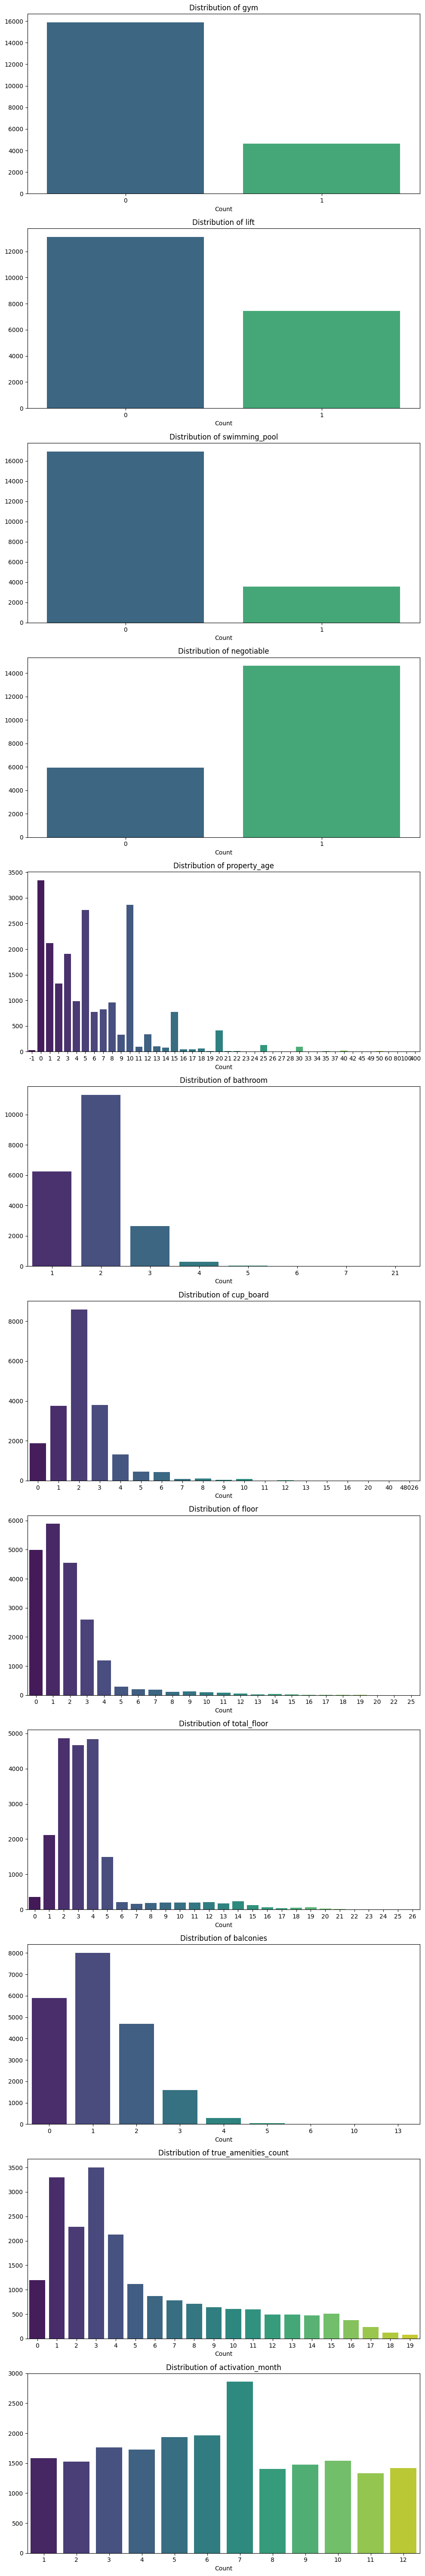

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# List of columns to plot
columns_to_plot = ['gym', 'lift', 'swimming_pool', 'negotiable', 'property_age', 'bathroom', 'cup_board',
                   'floor', 'total_floor', 'balconies', 'true_amenities_count', 'activation_month']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5 * len(columns_to_plot)))

# Loop through columns and create count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


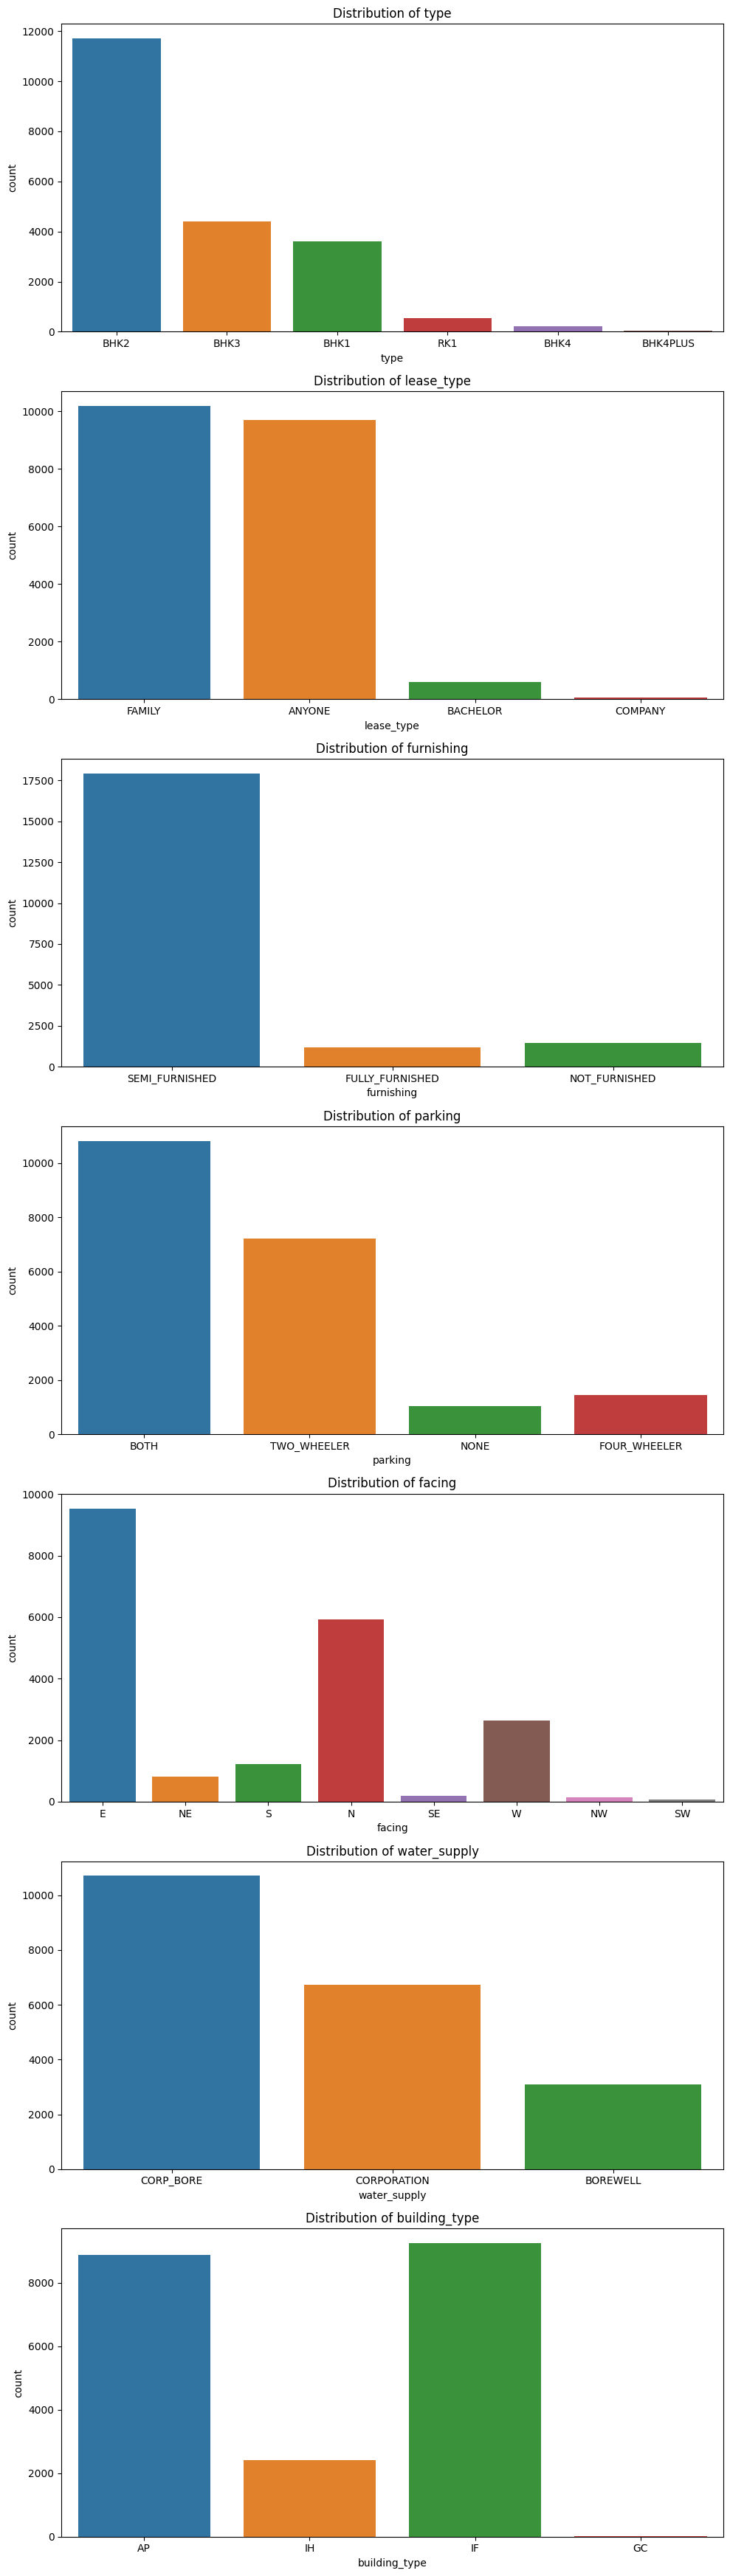

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# List of columns to plot
columns_to_plot = ['type', 'lease_type', 'furnishing', 'parking', 'facing', 'water_supply', 'building_type']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5 * len(columns_to_plot)))

# Loop through columns and create count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


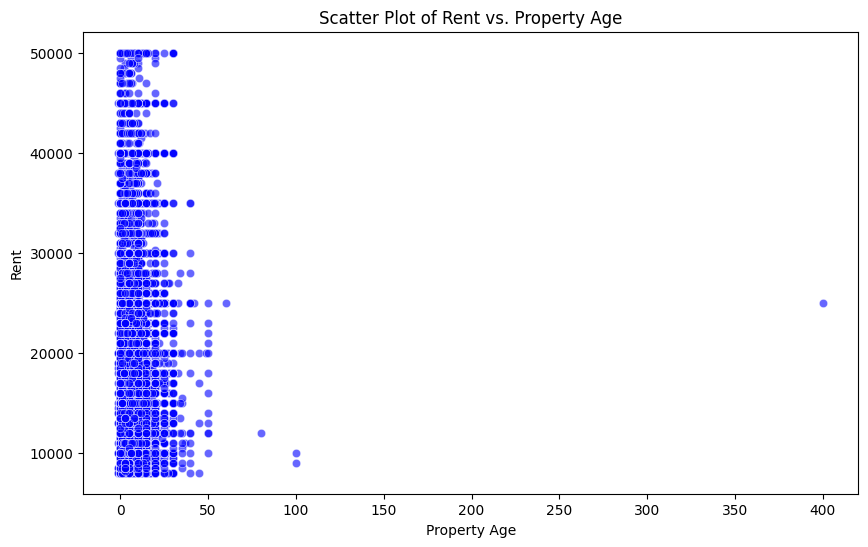

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='property_age', y='rent', data=data, alpha=0.6, color='blue')

# Set plot labels
plt.title('Scatter Plot of Rent vs. Property Age')
plt.xlabel('Property Age')
plt.ylabel('Rent')

plt.show()


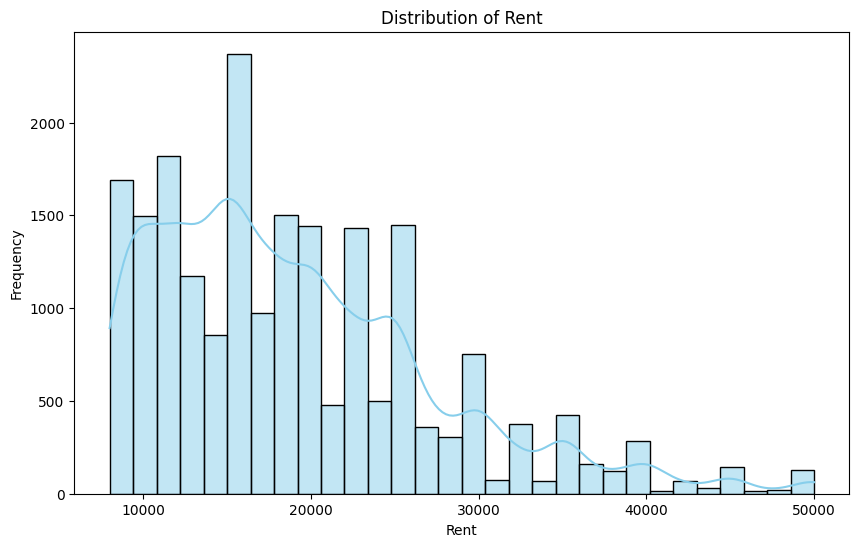

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram for 'rent'
sns.histplot(data['rent'], bins=30, kde=True, color='skyblue', ax=ax)

# Adding labels and title
ax.set_xlabel('Rent')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Rent')

plt.show()


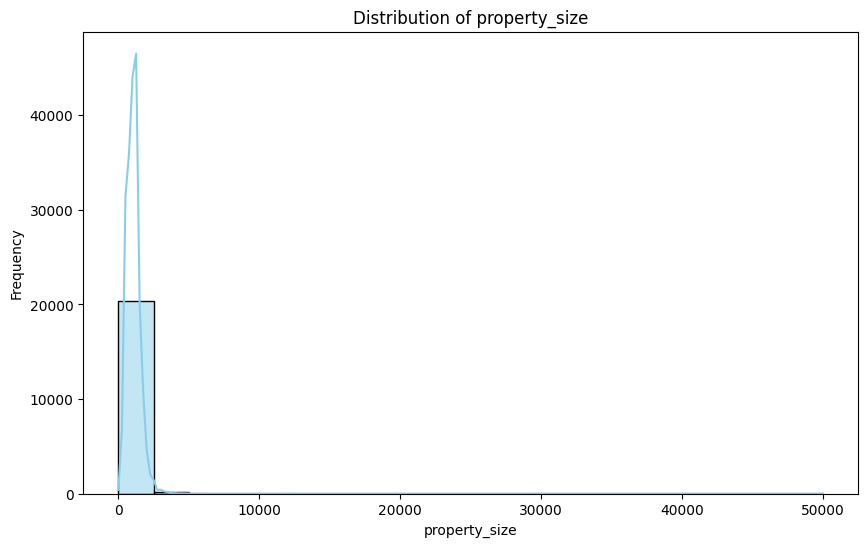

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram for 'rent'
sns.histplot(data['property_size'], bins=20, kde=True, color='skyblue', ax=ax)

# Adding labels and title
ax.set_xlabel('property_size')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of property_size')

plt.show()


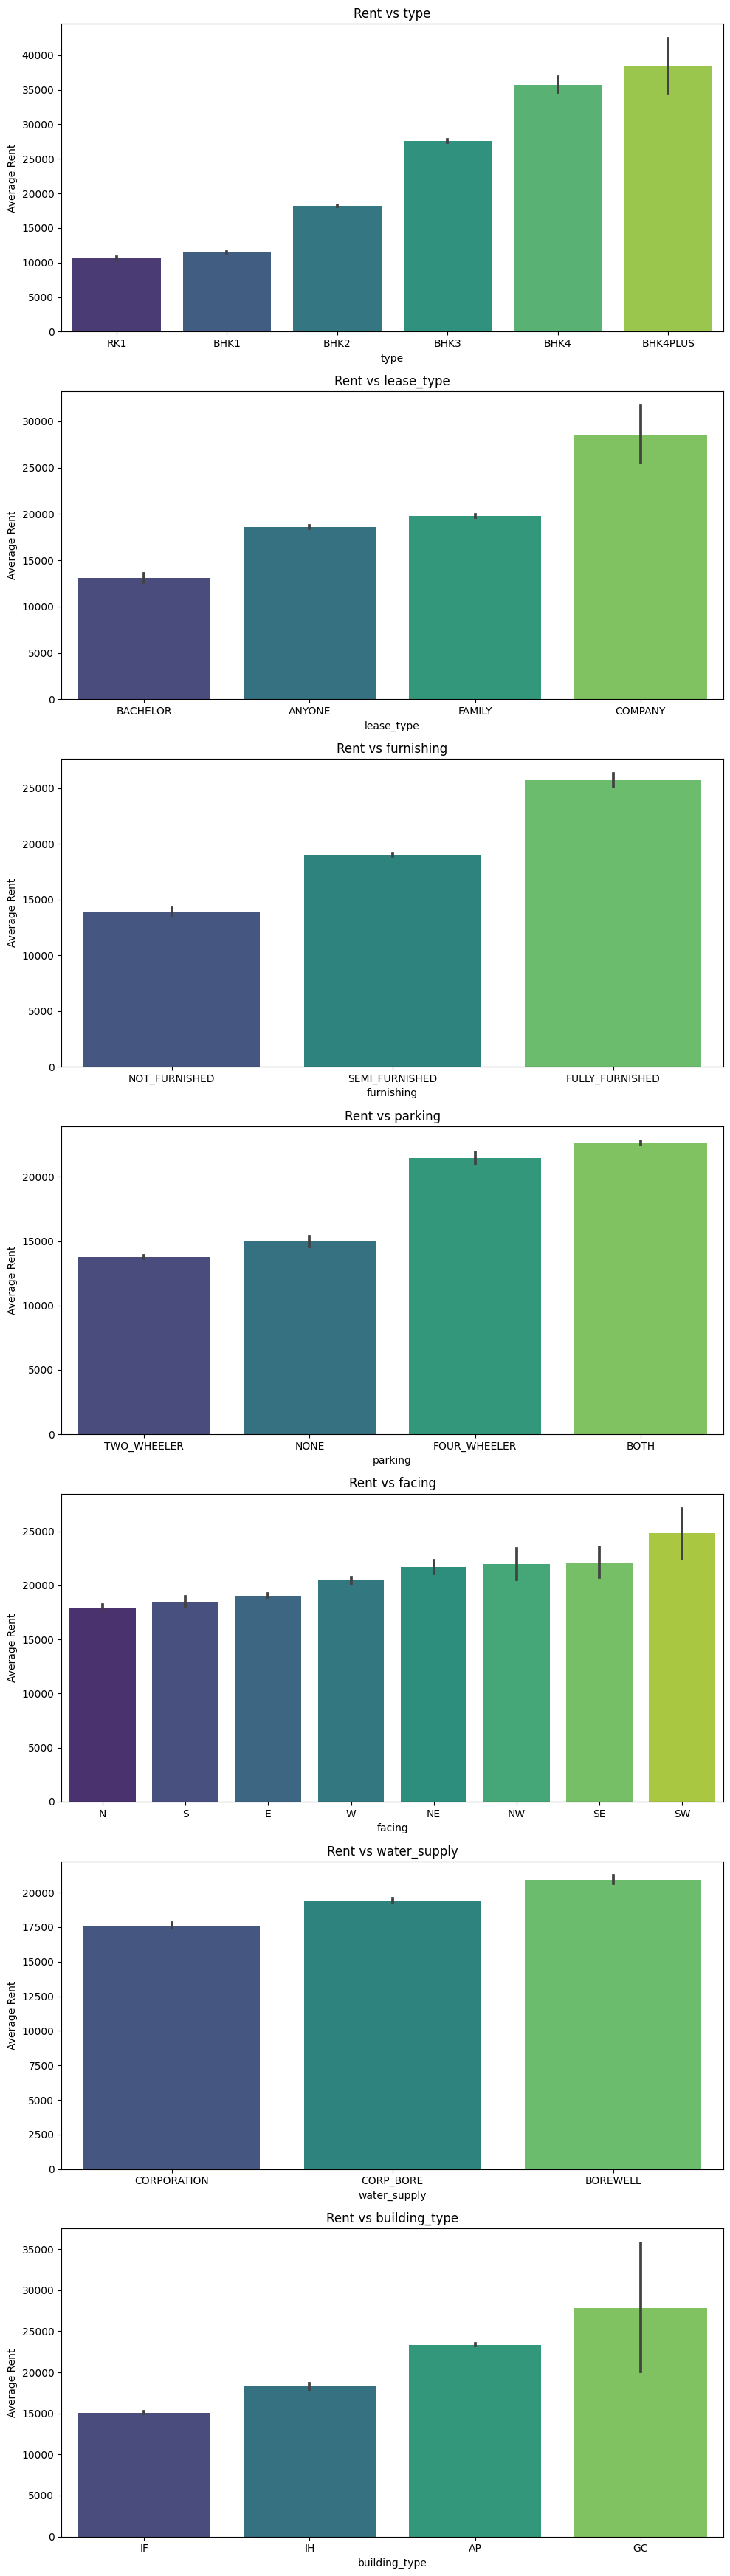

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# List of categorical columns
categorical_columns = ['type', 'lease_type', 'furnishing', 'parking', 'facing', 'water_supply', 'building_type']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 5 * len(categorical_columns)))

# Loop through categorical columns and create bar plots
for i, column in enumerate(categorical_columns):
    # Calculate average rent for each category and sort by rent
    average_rent_by_category = data.groupby(column)['rent'].mean().sort_values()

    sns.barplot(x=column, y='rent', data=data, ax=axes[i], order=average_rent_by_category.index, palette='viridis')
    axes[i].set_title(f'Rent vs {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Average Rent')

plt.tight_layout()
plt.show()


C:\Users\morle\AppData\Local\Temp\ipykernel_18508\3013620826.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
C:\Users\morle\AppData\Local\Temp\ipykernel_18508\3013620826.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
C:\Users\morle\AppData\Local\Temp\ipykernel_18508\3013620826.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
C:\Users\morle\AppData\Local\Temp\ipykernel_18508\3013620826.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
C:\Users\morle\A

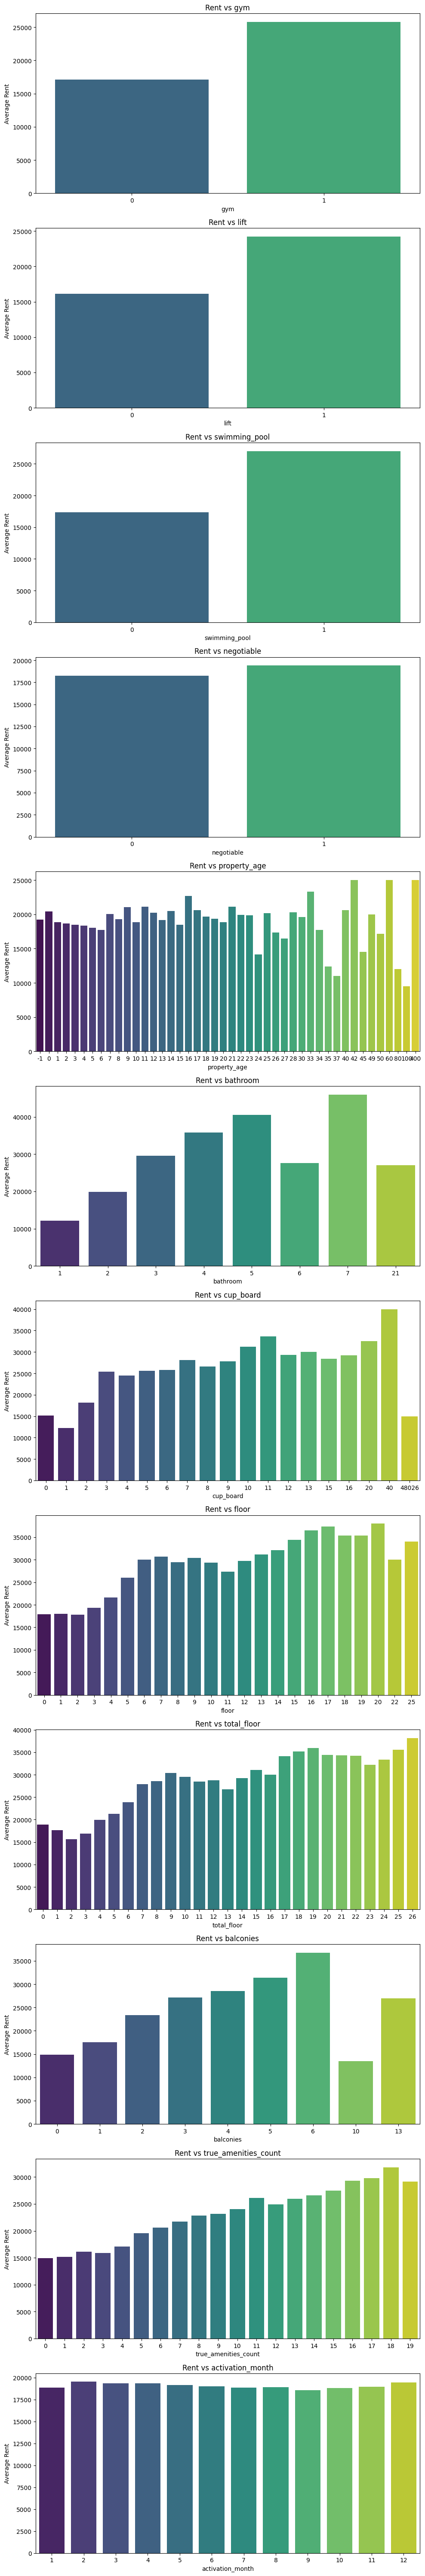

In [240]:
# List of columns to plot
columns_to_plot = ['gym', 'lift', 'swimming_pool', 'negotiable', 'property_age',
                   'bathroom', 'cup_board', 'floor', 'total_floor', 'balconies', 'true_amenities_count', 'activation_month']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5 * len(columns_to_plot)))

# Loop through columns and create bar plots
for i, column in enumerate(columns_to_plot):
    sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
    axes[i].set_title(f'Rent vs {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Average Rent')

plt.tight_layout()
plt.show()


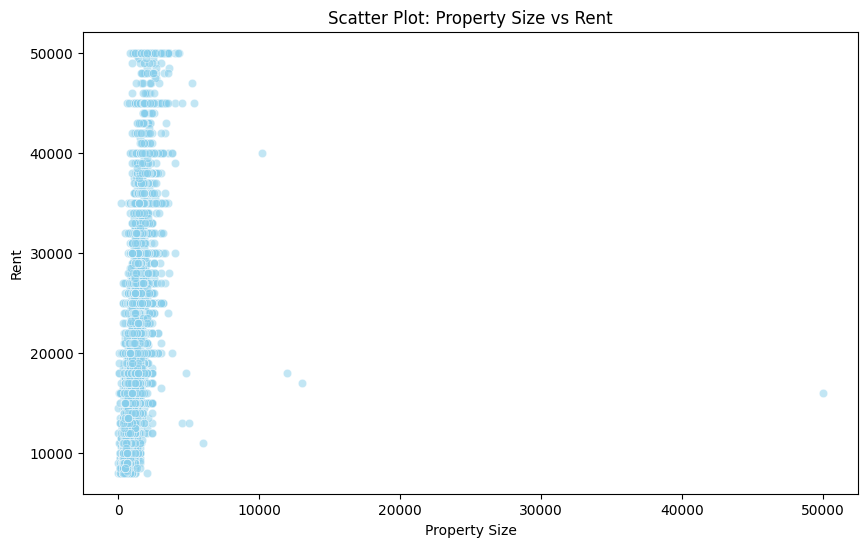

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# Set up the figure
plt.figure(figsize=(10, 6))

# Scatter plot for 'property_size' vs 'rent'
sns.scatterplot(x='property_size', y='rent', data=data, alpha=0.5, color='skyblue')

# Adding labels and title
plt.xlabel('Property Size')
plt.ylabel('Rent')
plt.title('Scatter Plot: Property Size vs Rent')

plt.show()


C:\Users\morle\AppData\Local\Temp\ipykernel_18508\1159465564.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='locality', y='rent', data=data_top_localities, ci=None, order=top_localities, palette='viridis')


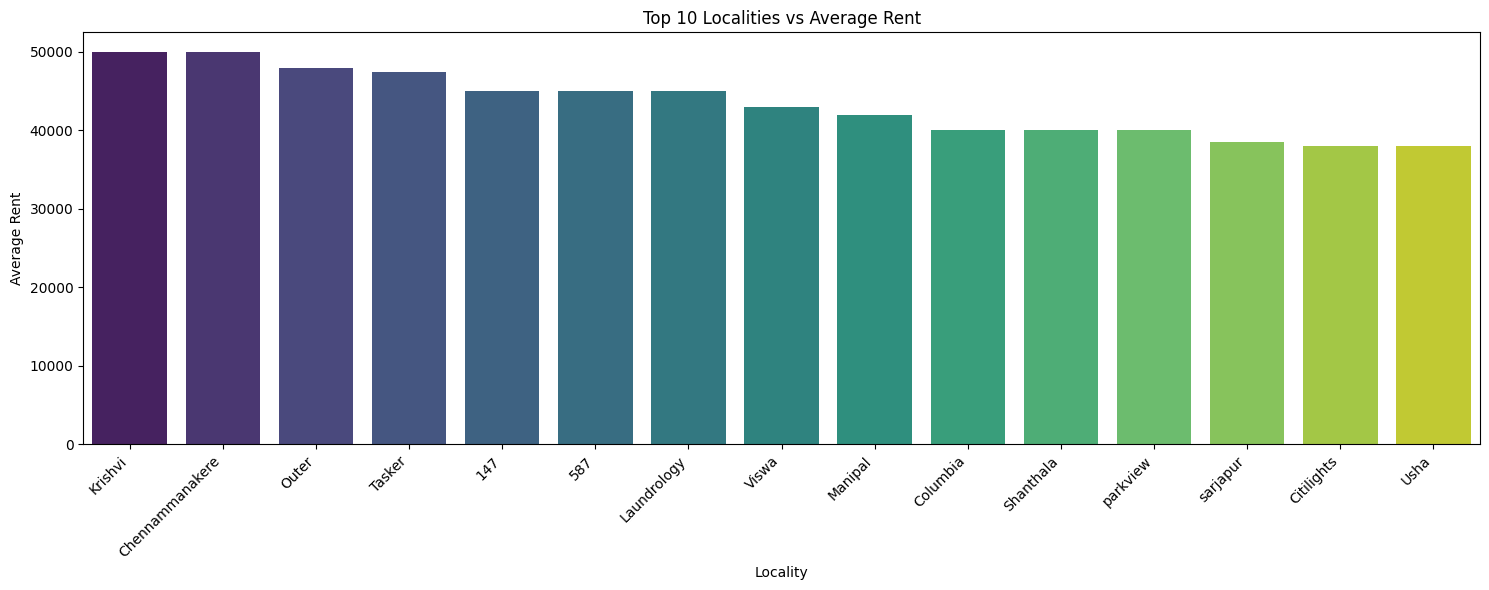

In [242]:
# Calculate the average rent for each locality and sort by rent
average_rent_by_locality = data.groupby('locality')['rent'].mean().sort_values(ascending=False)

# Select the top 10 localities
top_localities = average_rent_by_locality.head(15).index

# Filter the data for the top localities
data_top_localities = data[data['locality'].isin(top_localities)]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

# Create the bar plot for 'locality' vs 'rent'
sns.barplot(x='locality', y='rent', data=data_top_localities, ci=None, order=top_localities, palette='viridis')

# Adding labels and title
ax.set_xlabel('Locality')
ax.set_ylabel('Average Rent')
ax.set_title('Top 10 Localities vs Average Rent')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


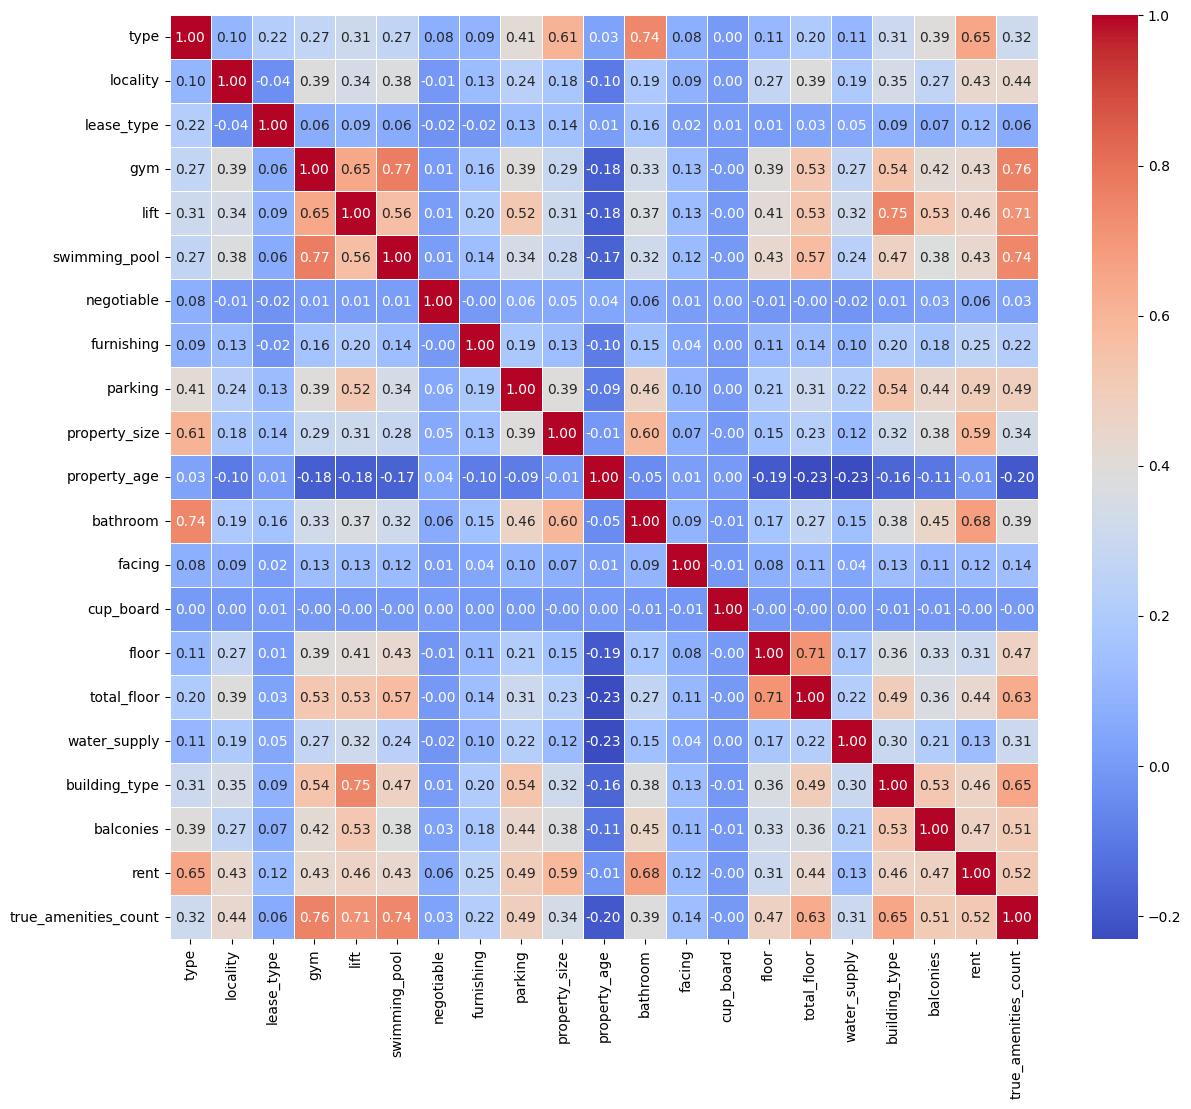

In [268]:
# Create a correlation matrix (replace 'data' with your DataFrame)
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

In [250]:
data.drop(columns = 'activation_month', inplace = True)

# **Encoding Categorical Variables**

In [251]:
data

,type,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,true_amenities_count
0,BHK2,Embassy,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25,2,E,2,6,12,CORP_BORE,AP,2,40000,15
1,BHK2,Bellandur,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4,2,NE,2,3,4,CORPORATION,AP,2,22000,8
2,BHK3,Thiruvanmiyur,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6,3,E,3,1,5,CORP_BORE,AP,3,28000,6
3,BHK1,Attiguppe,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3,1,E,1,1,2,CORPORATION,IH,0,8000,0
4,BHK3,Kodihalli,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15,3,E,4,0,0,CORPORATION,IH,1,45000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,BHK2,Gattigere,ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,1650,1,3,E,3,4,4,BOREWELL,AP,2,25000,10
20528,BHK2,Koramangala,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10,2,N,2,1,2,CORPORATION,IH,2,30000,4
20529,BHK2,Kumaraswamy,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0,2,W,2,5,5,BOREWELL,AP,2,16000,8
20530,BHK2,Indiranagar,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5,2,E,2,2,4,CORP_BORE,AP,3,30000,10


In [252]:
data['building_type'].value_counts() # two, none, 4 , both

building_type
IF    9240
AP    8876
IH    2399
GC      17
Name: count, dtype: int64

In [253]:
#LEBEL ENCODING (ORDER IS THERE SO I AM GOING FOR THIS , HOW I FIND HERE ORDER IS THERE I REFER THE VS PLOT THERE SHOWING A ORDER BAR PLOT)
data['type'] = data['type'].map({'RK1':0,'BHK1':1,'BHK2':2,'BHK3':3,'BHK4':4,'BHK4PLUS':5})
data['lease_type'] = data['lease_type'].map({'BACHELOR':0,'ANYONE':1,'FAMILY':2,'COMPANY':3})
data['furnishing'] = data['furnishing'].map({'NOT_FURNISHED':0,'SEMI_FURNISHED':1,'FULLY_FURNISHED':2})
data['parking'] = data['parking'].map({'TWO_WHEELER':0,'NONE':1,'FOUR_WHEELER':2,'BOTH':3})
data['facing'] = data['facing'].map({'N':0,'S':1,'E':2,'W':3, 'NE':4, 'NW':5, 'SE':6, 'SW':7})
data['water_supply'] = data['water_supply'].map({'CORPORATION':0,'CORP_BORE':1,'BOREWELL':2})
data['building_type'] = data['building_type'].map({'IF':0,'IH':1,'AP':2,'GC':3})

In [254]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [255]:
# Perform leave-one-out encoding for card_type, card_number, and tid
from category_encoders import LeaveOneOutEncoder

looe_encoder = LeaveOneOutEncoder(cols=['locality'])
data = looe_encoder.fit_transform(data, data['rent'])

In [256]:
data

,type,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,true_amenities_count
0,2,28000.000000,2,1,1,1,0,1,3,1250,25,2,2,2,6,12,1,2,2,40000,15
1,2,26597.111111,1,0,1,0,1,1,3,1400,4,2,4,2,3,4,0,2,2,22000,8
2,3,19056.733148,2,0,1,0,0,1,3,1350,6,3,2,3,1,5,1,2,3,28000,6
3,1,15622.448980,2,0,0,0,1,1,0,600,3,1,2,1,1,2,0,1,0,8000,0
4,3,20719.387755,2,0,0,0,1,1,3,1500,15,3,2,4,0,0,0,1,1,45000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,2,16107.142857,1,1,1,1,1,1,3,1650,1,3,2,3,4,4,2,2,2,25000,10
20528,2,20277.569170,1,0,0,0,1,1,3,1000,10,2,0,2,1,2,0,1,2,30000,4
20529,2,13745.526786,2,1,1,0,1,1,3,1000,0,2,3,2,5,5,2,2,2,16000,8
20530,2,22362.708333,2,0,1,0,0,1,3,1000,5,2,2,2,2,4,1,2,3,30000,10


# **SPLIT THE DATA**

In [257]:
X = data.drop('rent',axis=1)
y = data['rent']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=70)

In [258]:
print(X_train)
print(X_test)

       type      locality  lease_type  gym  lift  swimming_pool  negotiable  \
187       2  19210.917836           1    1     1              0           1   
14172     1  17921.052632           2    0     0              0           0   
9920      2  15273.387097           1    0     0              0           1   
16314     1  17842.771084           2    0     0              0           0   
8087      3  18660.681818           2    0     1              0           1   
...     ...           ...         ...  ...   ...            ...         ...   
14965     0  19857.142857           0    0     0              0           1   
5461      3  41000.000000           2    1     1              1           1   
12724     2  25481.651376           1    1     1              1           1   
15232     2  23912.500000           1    1     1              0           1   
12056     1  16138.888889           0    0     0              0           0   

       furnishing  parking  property_size  property

In [259]:
print(len(y_train))
print(len(y_test))

16425
4107


# **SCALE THE DATA**

In [260]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[-0.01624905,  0.03462015, -0.84345396, ...,  1.07930149,
          0.85121946,  0.16535367],
        [-1.35070207, -0.28248068,  0.94320212, ..., -1.04732122,
         -1.15513479, -0.48620988],
        [-0.01624905, -0.93338351, -0.84345396, ...,  0.01599013,
         -0.15195767, -1.13777344],
        ...,
        [-0.01624905,  1.57621903, -0.84345396, ...,  1.07930149,
         -0.15195767,  1.90285649],
        [-0.01624905,  1.19045842, -0.84345396, ...,  1.07930149,
         -0.15195767,  0.81691723],
        [-1.35070207, -0.72060831, -2.63011004, ..., -1.04732122,
         -0.15195767, -0.92058559]]),
 array([[-2.6851551 ,  1.85590708, -0.84345396, ...,  1.07930149,
         -1.15513479,  0.59972938],
        [-0.01624905, -0.00328466, -0.84345396, ..., -1.04732122,
         -1.15513479, -0.26902203],
        [-2.6851551 ,  0.68086167, -2.63011004, ..., -1.04732122,
         -1.15513479, -0.70339773],
        ...,
        [-0.01624905, -0.47841587,  0.94320212, ..., -

# **MODEL FITING**

In [261]:
# there are 4 steps in fitting a model 1.import, 2.initial, 3.Fit, 4. Prediction


In [262]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

##**Linear regression**

In [263]:
from sklearn.linear_model import LinearRegression #import
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[11505.32364748 22829.32014071 10889.80698446 ... 14655.48702437
 10461.22807205  7554.06879495]
6297     12000
13799    22000
16402    12000
9376     22000
15635    30000
         ...  
19076    16000
4971     15000
4392     15000
16380    10000
8184     12000
Name: rent, Length: 4107, dtype: int32


In [264]:
linear_model.score(X_test, y_test)

-844.9429293143339

In [265]:
from sklearn.model_selection import cross_val_score
# synatx : cross_val_score(model, fts_train, target_train, bins).mean()
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.7011605773365741

# **K Nearest Neighbor Regression**

In [275]:
knn_values=np.arange(1,50)
cross_val_knn=[]
for k in knn_values:
    knn_regressor=KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_scaled,y_train)
    print("K value : ", k, " train score : ", knn_regressor.score(X_train_scaled,y_train)  ,"cross_val_score : ", cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())
    cross_val_knn.append(cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())

K value :  1  train score :  1.0 cross_val_score :  0.4693929354367844
K value :  2  train score :  0.8681552704554982 cross_val_score :  0.5876758004704243
K value :  3  train score :  0.8179431461042723 cross_val_score :  0.6297316647107589
K value :  4  train score :  0.7917344756415545 cross_val_score :  0.6482192733189898
K value :  5  train score :  0.7770883100633796 cross_val_score :  0.6604338124766292
K value :  6  train score :  0.7648595972065735 cross_val_score :  0.6666827524653897
K value :  7  train score :  0.7568780814365657 cross_val_score :  0.6738431443851571
K value :  8  train score :  0.7503994475328224 cross_val_score :  0.6788064935831652
K value :  9  train score :  0.7465892684828463 cross_val_score :  0.6818872218882663
K value :  10  train score :  0.743030897487077 cross_val_score :  0.6835204357948721
K value :  11  train score :  0.7396300068787472 cross_val_score :  0.6847121260319927
K value :  12  train score :  0.7369048838741705 cross_val_score :  

In [ ]:
# for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [288]:
cross_val_knn_regressor=max(cross_val_knn)

In [289]:
print("The best K-Value is 19 and Cross_val_score is",cross_val_knn_regressor )

The best K-Value is 19 and Cross_val_score is 0.6894374303737145


In [290]:
#Implementing K Nearest Neighbor Regression
knn_regressor=KNeighborsRegressor(n_neighbors=19)
knn_regressor.fit(X_train_scaled,y_train)


KNeighborsRegressor(n_neighbors=19)

In [291]:
cross_val_knn_regressor=cross_val_score(knn_regressor,X_train_scaled,y_train,cv=15).mean()
cross_val_knn_regressor

0.6904754158946835

# **Decision Tree Regression**

In [292]:
#Choosing the best of depth Value
from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
    dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
    dt_regressor.fit(X_train,y_train)
    print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())
    cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())
   


Depth :  1  train Score  :  0.39372926378076467 cross_val_score :  0.39347571956111727
Depth :  2  train Score  :  0.563763795260628 cross_val_score :  0.5617161568095137
Depth :  3  train Score  :  0.6273833246915304 cross_val_score :  0.6224139988588758
Depth :  4  train Score  :  0.6631634000766111 cross_val_score :  0.654391945020934
Depth :  5  train Score  :  0.6936330055847135 cross_val_score :  0.6797961432932972
Depth :  6  train Score  :  0.7175223428148632 cross_val_score :  0.6930910265232981
Depth :  7  train Score  :  0.7417817822908899 cross_val_score :  0.7003025637677922
Depth :  8  train Score  :  0.7672582389527158 cross_val_score :  0.6980639887884307
Depth :  9  train Score  :  0.7925172421110763 cross_val_score :  0.6896949891182702
Depth :  10  train Score  :  0.8196100168152429 cross_val_score :  0.6827958605669356
Depth :  11  train Score  :  0.8475188270455533 cross_val_score :  0.6755881850418091
Depth :  12  train Score  :  0.8731742412471326 cross_val_score

In [293]:
cross_val_dt_regressor=max(cross_val_dt)

In [294]:
print("The best depth is 6 and Cross_val_score is:",cross_val_dt_regressor)

The best depth is 6 and Cross_val_score is: 0.7003025637677922


In [295]:
# Implementing Decision Tree Regression
dt_regressor=DecisionTreeRegressor(max_depth=6, random_state=0)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [296]:
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=10).mean()
cross_val_dt_regressor

0.6930910265232981

In [297]:
ftImp = list(zip(dt_regressor.feature_importances_, data.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
9,0.803536,property_size
1,0.102743,locality
11,0.031774,bathroom
0,0.027644,type
15,0.016338,total_floor
7,0.011409,furnishing
4,0.003942,lift
10,0.001327,property_age
8,0.000659,parking
19,0.000630,rent


# **Random Forest Regression**

In [319]:
#Choosing the best depth value
from sklearn.ensemble import RandomForestRegressor

max_depth=np.array([2,4,8,10,11,12,13,15,18,20])
cross_val_rf=[]
for d in max_depth:
    rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
    rf_regressor.fit(X_train,y_train)
    print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())
    cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())

Depth :  2 cross_val_score :  0.575829831954956
Depth :  4 cross_val_score :  0.6818142311096308
Depth :  8 cross_val_score :  0.7463280842854041
Depth :  10 cross_val_score :  0.7645419192385152
Depth :  11 cross_val_score :  0.7719810484738819
Depth :  12 cross_val_score :  0.7779812066206311
Depth :  13 cross_val_score :  0.7826918000839067
Depth :  15 cross_val_score :  0.7884667134848242
Depth :  18 cross_val_score :  0.7924017675245744
Depth :  20 cross_val_score :  0.7935551898786201


In [320]:
cross_val_rf_regressor=max(cross_val_rf)

In [ ]:
print("The best depth is 20 and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 20 and Cross_val_score is: 0.7935551898786201


In [322]:
#Implementing Random Forest Regression

rf_regressor=RandomForestRegressor(max_depth=20, random_state=0)
rf_regressor.fit(X_train,y_train)


RandomForestRegressor(max_depth=20, random_state=0)

In [323]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=15).mean()
cross_val_rf_regressor

0.7935551898786201

# **Extreme Gradient Boosting Regression**

In [324]:
#Choosing the best Learning Rate
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
    xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
    xgb_regressor.fit(X_train,y_train)
    print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
    cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.6277657558702752
Learning rate :  0.05 cross_val_score: 0.779819296793516
Learning rate :  0.08 cross_val_score: 0.790210032090845
Learning rate :  0.1 cross_val_score: 0.7938771094254379
Learning rate :  0.2 cross_val_score: 0.801816192100967
Learning rate :  0.25 cross_val_score: 0.8012432643970158
Learning rate :  0.3 cross_val_score: 0.8003831587596391


In [325]:
cross_val_xgb_regressor=max(cross_val_xgb)

In [326]:
print("The best Learning rate is 0.2 and Cross_val_score is:",cross_val_xgb_regressor)


The best Learning rate is 0.2 and Cross_val_score is: 0.801816192100967


In [327]:
#Implementing Extreme Gradient Boosting Regression

xgb_regressor= xgb.XGBRegressor(learning_rate =0.2,n_estimators=100) # initialise the model
xgb_regressor.fit(X_train,y_train) #train the model


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [328]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

0.801816192100967

In [329]:
print("Cross Validation Score for Linear Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model: 0.7011605773365741
Cross Validation Score for K-Nearest Neighbors Regression Model: 0.6904754158946835
Cross Validation Score for Decision Tree Regression Model:  0.6930910265232981
Cross Validation Score for Random Forest Regression Model:  0.7935551898786201
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.801816192100967


# **R2 Score for Machine-Learning Models**

In [339]:
from sklearn.metrics import r2_score

In [340]:
y_pred_lr=linear_model.predict(X_test)
y_pred_knn=knn_regressor.predict(X_test)
y_pred_dt= dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

C:\Users\morle\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [341]:
R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_knn=r2_score(y_test,y_pred_knn)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

In [342]:
print("R2 Score for Linear Regression Model:",R2_score_lr)
print("R2 Score for K-Nearest Neighbors Regression Model:",R2_score_knn)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Linear Regression Model: -844.9429293143339
R2 Score for K-Nearest Neighbors Regression Model: -1.0305228646230145
R2 Score for Decision Tree Regression Model:  0.6845523309603985
R2 Score for Random Forest Regression Model:  0.7778771214185687
R2 Score for Extreme-Gradient Boosting Regression Model:  0.7809759974811658


# **Suggestion to Sellers and buyers-Solving problem statements based on Feature Importance**

In [343]:
xgb_regressor.feature_importances_

array([0.08044483, 0.05085928, 0.01625625, 0.00982997, 0.0489485 ,
       0.01593012, 0.00787797, 0.04896178, 0.02914349, 0.41039702,
       0.0161268 , 0.08455313, 0.00974096, 0.0295808 , 0.01003958,
       0.04394628, 0.02012348, 0.04183591, 0.01206365, 0.01334029],
      dtype=float32)

In [344]:
data.columns

Index(['type', 'locality', 'lease_type', 'gym', 'lift', 'swimming_pool',
       'negotiable', 'furnishing', 'parking', 'property_size', 'property_age',
       'bathroom', 'facing', 'cup_board', 'floor', 'total_floor',
       'water_supply', 'building_type', 'balconies', 'rent',
       'true_amenities_count'],
      dtype='object')

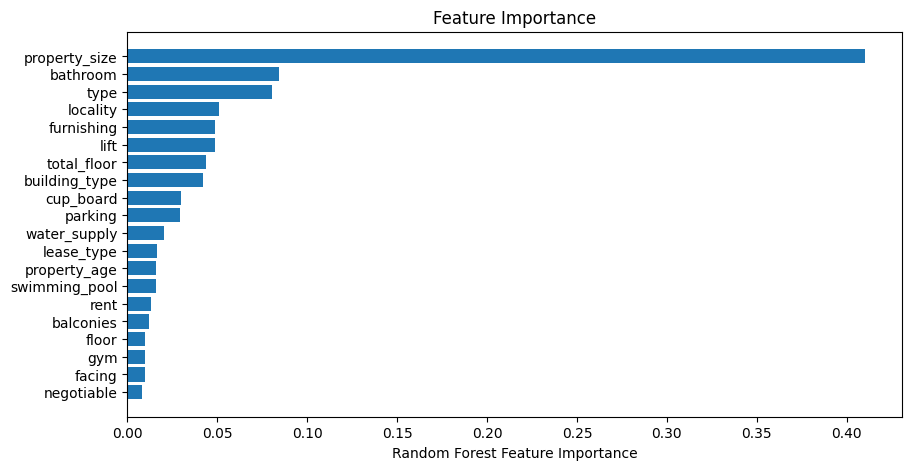

In [345]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(data.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

In [346]:
xgb_regressor.feature_importances_

array([0.08044483, 0.05085928, 0.01625625, 0.00982997, 0.0489485 ,
       0.01593012, 0.00787797, 0.04896178, 0.02914349, 0.41039702,
       0.0161268 , 0.08455313, 0.00974096, 0.0295808 , 0.01003958,
       0.04394628, 0.02012348, 0.04183591, 0.01206365, 0.01334029],
      dtype=float32)

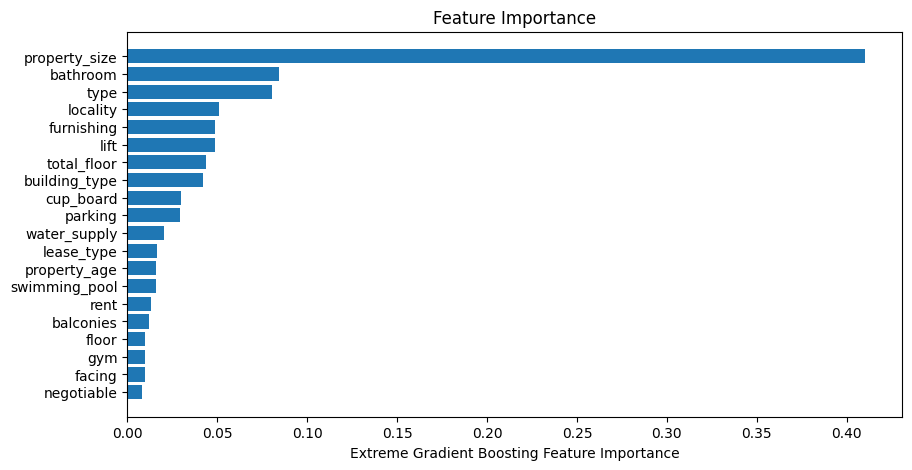

In [347]:

sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(data.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

# **Evaluate Your System on the Test Set**

In [351]:
test = pd.read_excel('House_Rent_Test.xlsx')

In [352]:
test.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies
0,ff8081815df539bc015df947ce976cca,BHK2,Basavanagudi,22-08-2017 09:00,12.941603,77.568156,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1300,1,2,N,2,3,3,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,1
1,ff80818157288e9301572c05651853a6,BHK2,Rajaji Nagar,17-09-2017 16:33,12.998803,77.561887,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,7,1,S,2,0,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
2,ff8081815f1afc58015f1b831fde166e,BHK1,Jeevan Bima Nagar,14-04-2018 17:27,12.966467,77.661063,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,10,1,S,1,0,1,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
3,ff8081816035b31901603f7922c046e0,BHK1,Jayanagar 1st Block,2017-11-12 13:15:00,12.941533,77.592606,ANYONE,0,0,0,0,NOT_FURNISHED,TWO_WHEELER,500,8,1,E,0,2,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,0
4,ff8081815c3582f5015c38fc31aa73a4,BHK3,Whitefield Hope Farm Junction,2017-11-07 16:44:00,12.971083,77.751625,ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,1400,0,3,E,3,3,4,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,1


In [353]:
test.tail()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies
4495,ff8081815216f51101521aa9d46c191f,BHK2,Hanumanthnagar,2018-10-06 18:22:00,12.941654,77.559999,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,950,2,2,N,2,3,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,2
4496,ff8081816098166901609bf52bb702a8,BHK2,Lakkasandra,21-01-2018 14:36,12.942973,77.597738,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,750,10,1,N,2,2,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,1
4497,ff808181629ac9860162a7ac1a4253bb,BHK1,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",30-05-2018 16:10,12.949315,77.713807,ANYONE,0,0,0,1,SEMI_FURNISHED,NONE,500,10,1,W,1,2,3,"{""SC"":false,""INTERCOM"":false,""AC"":false,""PB"":f...",CORP_BORE,IH,0
4498,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,2018-11-07 16:17:00,12.914104,77.716428,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1450,1,3,N,4,10,10,"{""SC"":false,""INTERCOM"":true,""AC"":false,""PB"":tr...",BOREWELL,AP,3
4499,ff808181615af5c101616150bd28356e,BHK3,Kaikondrahalli,27-03-2018 16:25,12.915296,77.676694,FAMILY,1,1,1,0,SEMI_FURNISHED,FOUR_WHEELER,1500,10,3,E,7,5,8,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",BOREWELL,AP,3


In [354]:
test.shape

(4500, 24)

In [355]:
test.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies'],
      dtype='object')

In [356]:
test.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
dtype: int64

In [357]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4500 non-null   object 
 1   type             4500 non-null   object 
 2   locality         4500 non-null   object 
 3   activation_date  4500 non-null   object 
 4   latitude         4500 non-null   float64
 5   longitude        4500 non-null   float64
 6   lease_type       4500 non-null   object 
 7   gym              4500 non-null   int64  
 8   lift             4500 non-null   int64  
 9   swimming_pool    4500 non-null   int64  
 10  negotiable       4500 non-null   int64  
 11  furnishing       4500 non-null   object 
 12  parking          4500 non-null   object 
 13  property_size    4500 non-null   int64  
 14  property_age     4500 non-null   int64  
 15  bathroom         4500 non-null   int64  
 16  facing           4500 non-null   object 
 17  cup_board     

In [358]:
test.drop(columns = ['id'],inplace=True)

In [359]:
test['type'].value_counts()

type
BHK2        2524
BHK3         990
BHK1         808
RK1          105
BHK4          66
BHK4PLUS       7
Name: count, dtype: int64

In [360]:
test['activation_date'] = pd.to_datetime(test['activation_date'])

C:\Users\morle\AppData\Local\Temp\ipykernel_18508\3855406022.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  test['activation_date'] = pd.to_datetime(test['activation_date'])


In [361]:
test['bathroom'] = test['bathroom'].astype(int)
test['cup_board'] = test['cup_board'].astype(int)
test['floor'] = test['floor'].astype(int)
test['total_floor'] = test['total_floor'].astype(int)
test['balconies'] = test['balconies'].astype(int)
test['property_age'] = test['property_age'].astype(int)
#test['rent'] = test['rent'].astype(int)

In [362]:
import json

# Assuming 'data' is the name of your DataFrame
test['amenities'] = test['amenities'].apply(json.loads)
test['true_amenities_count'] = test['amenities'].apply(lambda x: list(x.values()).count(True))


In [363]:
test.drop(columns = 'amenities', inplace = True)

In [364]:
test.drop(columns=['activation_date', 'latitude', 'longitude'], inplace=True)
#test.drop(columns=['latitude', 'longitude','prop_age_category'], inplace=True)


In [365]:
#LEBEL ENCODING (ORDER IS THERE SO I AM GOING FOR THIS , HOW I FIND HERE ORDER IS THERE I REFER THE VS PLOT THERE SHOWING A ORDER BAR PLOT)
test['type'] = test['type'].map({'RK1':0,'BHK1':1,'BHK2':2,'BHK3':3,'BHK4':4,'BHK4PLUS':5})
test['lease_type'] = test['lease_type'].map({'BACHELOR':0,'ANYONE':1,'FAMILY':2,'COMPANY':3})
test['furnishing'] = test['furnishing'].map({'NOT_FURNISHED':0,'SEMI_FURNISHED':1,'FULLY_FURNISHED':2})
test['parking'] = test['parking'].map({'TWO_WHEELER':0,'NONE':1,'FOUR_WHEELER':2,'BOTH':3})
test['facing'] = test['facing'].map({'N':0,'S':1,'E':2,'W':3, 'NE':4, 'NW':5, 'SE':6, 'SW':7})
test['water_supply'] = test['water_supply'].map({'CORPORATION':0,'CORP_BORE':1,'BOREWELL':2})
test['building_type'] = test['building_type'].map({'IF':0,'IH':1,'AP':2,'GC':3})

In [366]:
# Perform leave-one-out encoding for card_type, card_number, and tid
from category_encoders import LeaveOneOutEncoder

looe_encoder = LeaveOneOutEncoder(cols=['locality'])
test = looe_encoder.fit_transform(test, test['property_size'])

In [367]:
test

,type,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,true_amenities_count
0,2,973.173077,2,0,1,0,0,1,3,1300,1,2,0,2,3,3,1,2,1,4
1,2,792.159091,1,0,0,0,1,1,0,600,7,1,1,2,0,3,0,0,0,4
2,1,691.777778,1,0,0,0,1,1,0,600,10,1,1,1,0,1,0,0,0,5
3,1,1072.577778,1,0,0,0,0,0,0,500,8,1,2,0,2,2,1,0,0,2
4,3,1522.514286,1,1,1,1,1,1,3,1400,0,3,2,3,3,4,2,2,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,2,700.000000,2,0,0,0,1,1,3,950,2,2,0,2,3,3,1,0,2,3
4496,2,695.000000,1,0,0,0,1,1,0,750,10,1,0,2,2,3,0,0,1,1
4497,1,1072.577778,1,0,0,0,1,1,1,500,10,1,3,1,2,3,1,1,0,1
4498,3,1475.000000,2,1,1,1,1,1,3,1450,1,3,0,4,10,10,2,2,3,9


In [368]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create DMatrix objects for XGBoost

dtrain = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)
test = xgb.DMatrix(data=test, enable_categorical=True)

In [369]:
import xgboost as xgb

# Assuming you already have dtrain and dtest defined from previous steps

# Specify the XGBoost parameters such as 'max_depth', 'eta', etc.
params = {
    'max_depth': 5,
    'eta': 0.2,
    'objective': 'reg:squarederror',  # Specify the appropriate objective for your problem
}

# Perform cross-validation with 10 folds
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,  # You can adjust the number of boosting rounds
    nfold=10,  # Number of cross-validation folds
    metrics={'rmse'},  # Evaluation metric (Root Mean Squared Error)
    early_stopping_rounds=10,  # Optional: Early stopping rounds
    seed=42  # Optional: Seed for reproducibility
)

# Get the best number of boosting rounds
best_num_boost_rounds = cv_results['test-rmse-mean'].idxmin()

# Re-train the model with the best number of boosting rounds
xgb_reg = xgb.train(params, dtrain, num_boost_round=best_num_boost_rounds)

# Make predictions on the test set
y_pred = xgb_reg.predict(test)

In [370]:
def custom_round(x):
    round_value=round(x*100)
    return round_value/100

In [371]:
y_pred1=np.vectorize(custom_round)(y_pred)

In [372]:
y_pred1

array([17811.42, 10735.47,  9286.76, ...,  9698.7 , 22328.38, 24704.61])

In [374]:
submission =  pd.read_excel('House_Rent_Test.xlsx')

Predicted_rent=pd.DataFrame({'id':submission['id'],'rent':y_pred1})

In [375]:
Predicted_rent.to_csv('Submission.csv', index = False)

In [376]:
Submission = pd.read_csv('Submission.csv')
Submission

,id,rent
0,ff8081815df539bc015df947ce976cca,17811.42
1,ff80818157288e9301572c05651853a6,10735.47
2,ff8081815f1afc58015f1b831fde166e,9286.76
3,ff8081816035b31901603f7922c046e0,8362.92
4,ff8081815c3582f5015c38fc31aa73a4,18396.58
...,...,...
4495,ff8081815216f51101521aa9d46c191f,14456.68
4496,ff8081816098166901609bf52bb702a8,11734.29
4497,ff808181629ac9860162a7ac1a4253bb,9698.70
4498,ff8081815b57c717015b580af22f1bbd,22328.38
